# Deep dive into Chunking Strategies for RAG

- Why do we need chunking in RAG
- Different chunking strategies , Pros and Cons
  - Charector Text Splitter
  - Recursive Charecter Text Splitter
  - Token Text Splitter
  - Semantic Chunking 

### Why do we need chunking ??

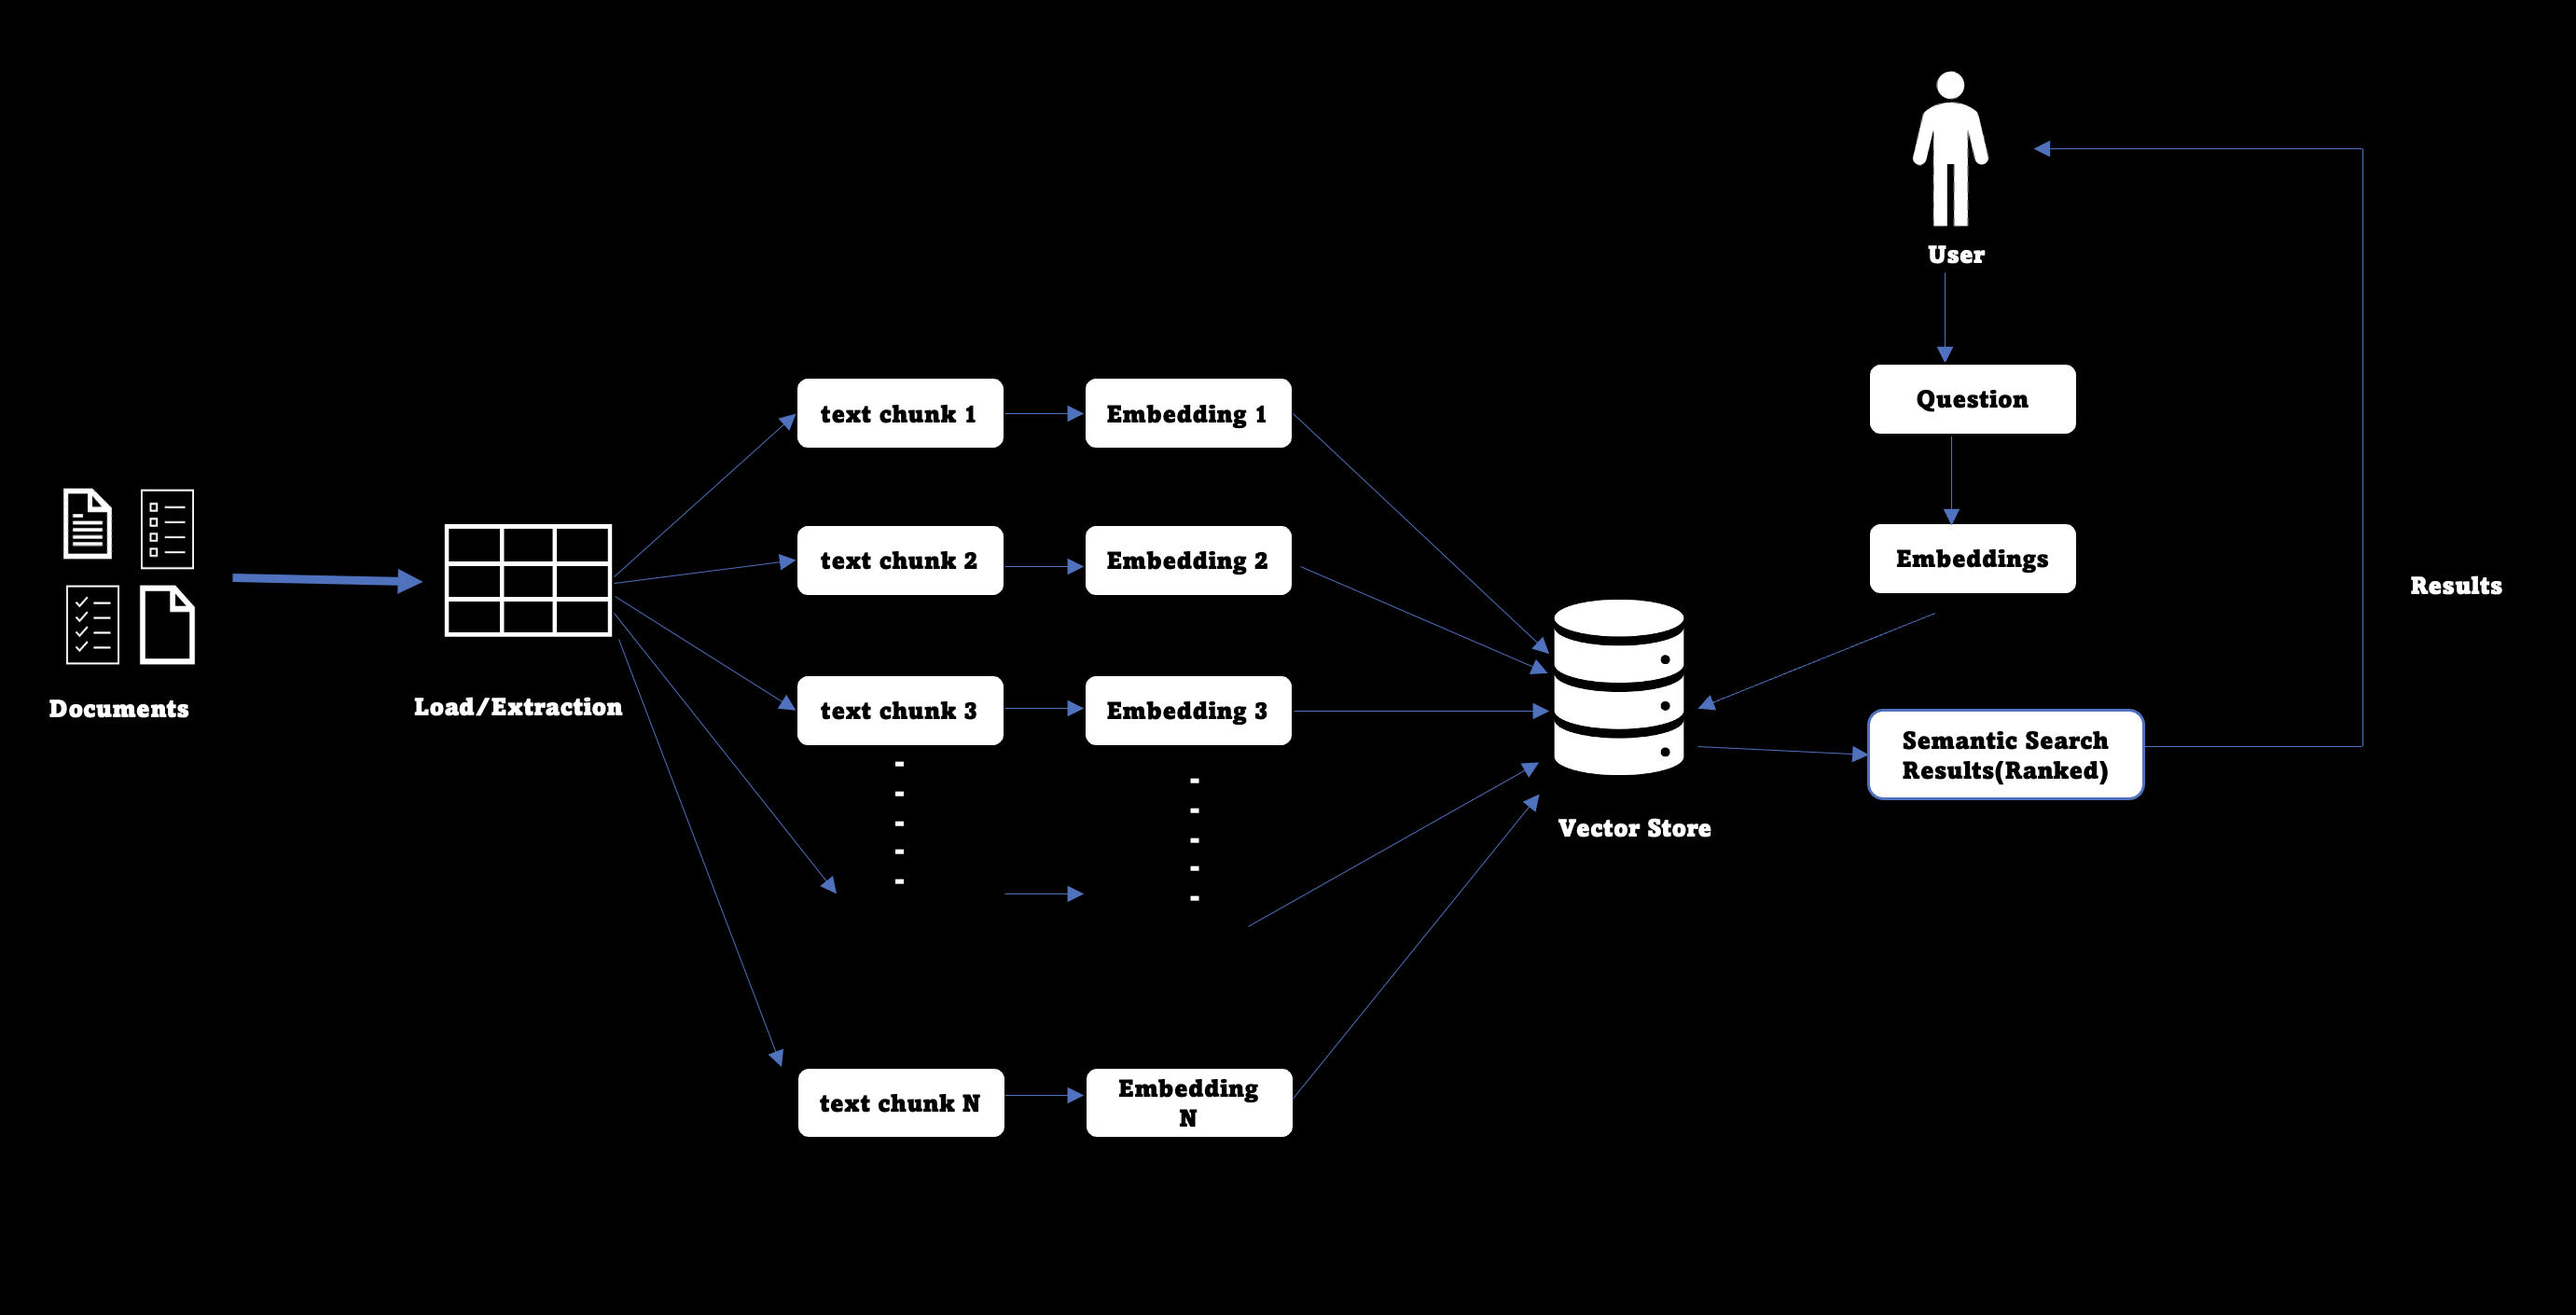

In [240]:
from IPython.display import Image
Image(filename='RAG.png',width=1200)

In [255]:
text = """
Transformer is a deep neural network that employs a self-attention mechanism to comprehend the contextual
relationships within sequential data. Unlike conventional neural networks or updated versions of
Recurrent Neural Networks (RNNs) such as Long Short-Term Memory (LSTM), transformer models excel
in handling long dependencies between input sequence elements and enable parallel processing. 

As a result,transformer-based models have attracted substantial interest among researchers in the field of artificial intelligence.
This can be attributed to their immense potential and remarkable achievements, not only in Natural
Language Processing (NLP) tasks but also in a wide range of domains, including computer vision, audio
and speech processing, healthcare, and the Internet of Things (IoT).

Although several survey papers have been published highlighting the transformer’s contributions in specific fields, architectural differences, or
performance evaluations, there is still a significant absence of a comprehensive survey paper encompassing
its major applications across various domains. Therefore, we undertook the task of filling this gap by conducting
an extensive survey of proposed transformer models from 2017 to 2022. Our survey encompasses
the identification of the top five application domains for transformer-based models, namely: NLP, Computer
Vision, Multi-Modality, Audio and Speech Processing, and Signal Processing. We analyze the impact of
highly influential transformer-based models in these domains and subsequently classify them based on their
respective tasks using a proposed taxonomy. Our aim is to shed light on the existing potential and future
possibilities of transformers for enthusiastic researchers, thus contributing to the broader understanding of
this groundbreaking technology.
"""

In [256]:
print(text)


Transformer is a deep neural network that employs a self-attention mechanism to comprehend the contextual
relationships within sequential data. Unlike conventional neural networks or updated versions of
Recurrent Neural Networks (RNNs) such as Long Short-Term Memory (LSTM), transformer models excel
in handling long dependencies between input sequence elements and enable parallel processing. 

As a result,transformer-based models have attracted substantial interest among researchers in the field of artificial intelligence.
This can be attributed to their immense potential and remarkable achievements, not only in Natural
Language Processing (NLP) tasks but also in a wide range of domains, including computer vision, audio
and speech processing, healthcare, and the Internet of Things (IoT).

Although several survey papers have been published highlighting the transformer’s contributions in specific fields, architectural differences, or
performance evaluations, there is still a significant 

## CharacterTextSplitter

Simply divides the document/text based on the Character length (not on the token length)

- easy to use and understand

- Issues:
  - Doesn't look into the structure of the data
  - even sentences or words can be split into different parts

In [171]:
from langchain.text_splitter import CharacterTextSplitter

In [257]:
text_splitter = CharacterTextSplitter(chunk_size=200,
                                      chunk_overlap=0,
                                      separator=''
                                      )

In [173]:
chunks = text_splitter.create_documents([text])

In [174]:
len(chunks)

10

In [175]:
chunks

[Document(page_content='Transformer is a deep neural network that employs a self-attention mechanism to comprehend the contextual\nrelationships within sequential data. Unlike conventional neural networks or updated versions'),
 Document(page_content='of\nRecurrent Neural Networks (RNNs) such as Long Short-Term Memory (LSTM), transformer models excel\nin handling long dependencies between input sequence elements and enable parallel processing. \n\nAs'),
 Document(page_content='a result,transformer-based models have attracted substantial interest among researchers in the field of artificial intelligence.\nThis can be attributed to their immense potential and remarkable achiev'),
 Document(page_content='ements, not only in Natural\nLanguage Processing (NLP) tasks but also in a wide range of domains, including computer vision, audio\nand speech processing, healthcare, and the Internet of Things (IoT).'),
 Document(page_content='Although several survey papers have been published highlighti

In [176]:
for i in range(len(chunks)):
    print(f"Chunk - {i} length: {len(chunks[i].page_content)}")

Chunk - 0 length: 199
Chunk - 1 length: 198
Chunk - 2 length: 200
Chunk - 3 length: 198
Chunk - 4 length: 199
Chunk - 5 length: 200
Chunk - 6 length: 200
Chunk - 7 length: 198
Chunk - 8 length: 200
Chunk - 9 length: 22


### What to use create documents and split documents ?


```
from langchain_community.document_loaders import TextLoader, DirectoryLoader

### Reading the txt files from source directory

loader = DirectoryLoader('./source', glob="./*.txt", loader_cls=TextLoader)
docs = loader.load()

new_docs = text_splitter.split_documents(documents=docs)

```

In [177]:
text_splitter = CharacterTextSplitter(chunk_size=200,
                                      chunk_overlap=20,
                                      separator=''
                                      )

In [178]:
chunks = text_splitter.create_documents([text])

In [179]:
chunks[:2]

[Document(page_content='Transformer is a deep neural network that employs a self-attention mechanism to comprehend the contextual\nrelationships within sequential data. Unlike conventional neural networks or updated versions'),
 Document(page_content='or updated versions of\nRecurrent Neural Networks (RNNs) such as Long Short-Term Memory (LSTM), transformer models excel\nin handling long dependencies between input sequence elements and enable parall')]

In [181]:
len(chunks)

11

## Recursive Charecter Text Splitter

Looks into the structure of the data.

First tries to split based on the double new lines i.e. paragraphs , then it tries to combine two paragraphs and checks if the combine length is smaller than given chunk size or not else it tries to split based on sentences/words/characters


1.  "\n\n" - paragraphs
2.  "\n" - sentences
3.  " " - words
4.  "" - charecters


Issues : Only looks into the structure of the text , doesn't look into the semantic meaning of the chunks.


In [182]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [189]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500,
                                      chunk_overlap=0,
                                      length_function=len
                                      )

In [190]:
chunks = text_splitter.create_documents([text])

In [192]:
for i in range(len(chunks)):
    print(f"Chunk: {i} \n Length: {len(chunks[i].page_content)} \n Content : {chunks[i].page_content} \n ")

Chunk: 0 
 Length: 393 
 Content : Transformer is a deep neural network that employs a self-attention mechanism to comprehend the contextual
relationships within sequential data. Unlike conventional neural networks or updated versions of
Recurrent Neural Networks (RNNs) such as Long Short-Term Memory (LSTM), transformer models excel
in handling long dependencies between input sequence elements and enable parallel processing. 
 
Chunk: 1 
 Length: 401 
 Content : As a result,transformer-based models have attracted substantial interest among researchers in the field of artificial intelligence.
This can be attributed to their immense potential and remarkable achievements, not only in Natural
Language Processing (NLP) tasks but also in a wide range of domains, including computer vision, audio
and speech processing, healthcare, and the Internet of Things (IoT). 
 
Chunk: 2 
 Length: 459 
 Content : Although several survey papers have been published highlighting the transformer’s contributio

# Split by tokens 

  - Charector Text Splitter
  - Recursive Charecter Text Splitter
  
These two approaches looks into the charecters counts and not into the token counts , so if you want to be sure that token count should not exceed 

- token limit for the embedding model
- context length of the llm

we can use the TokenTextSplitter.

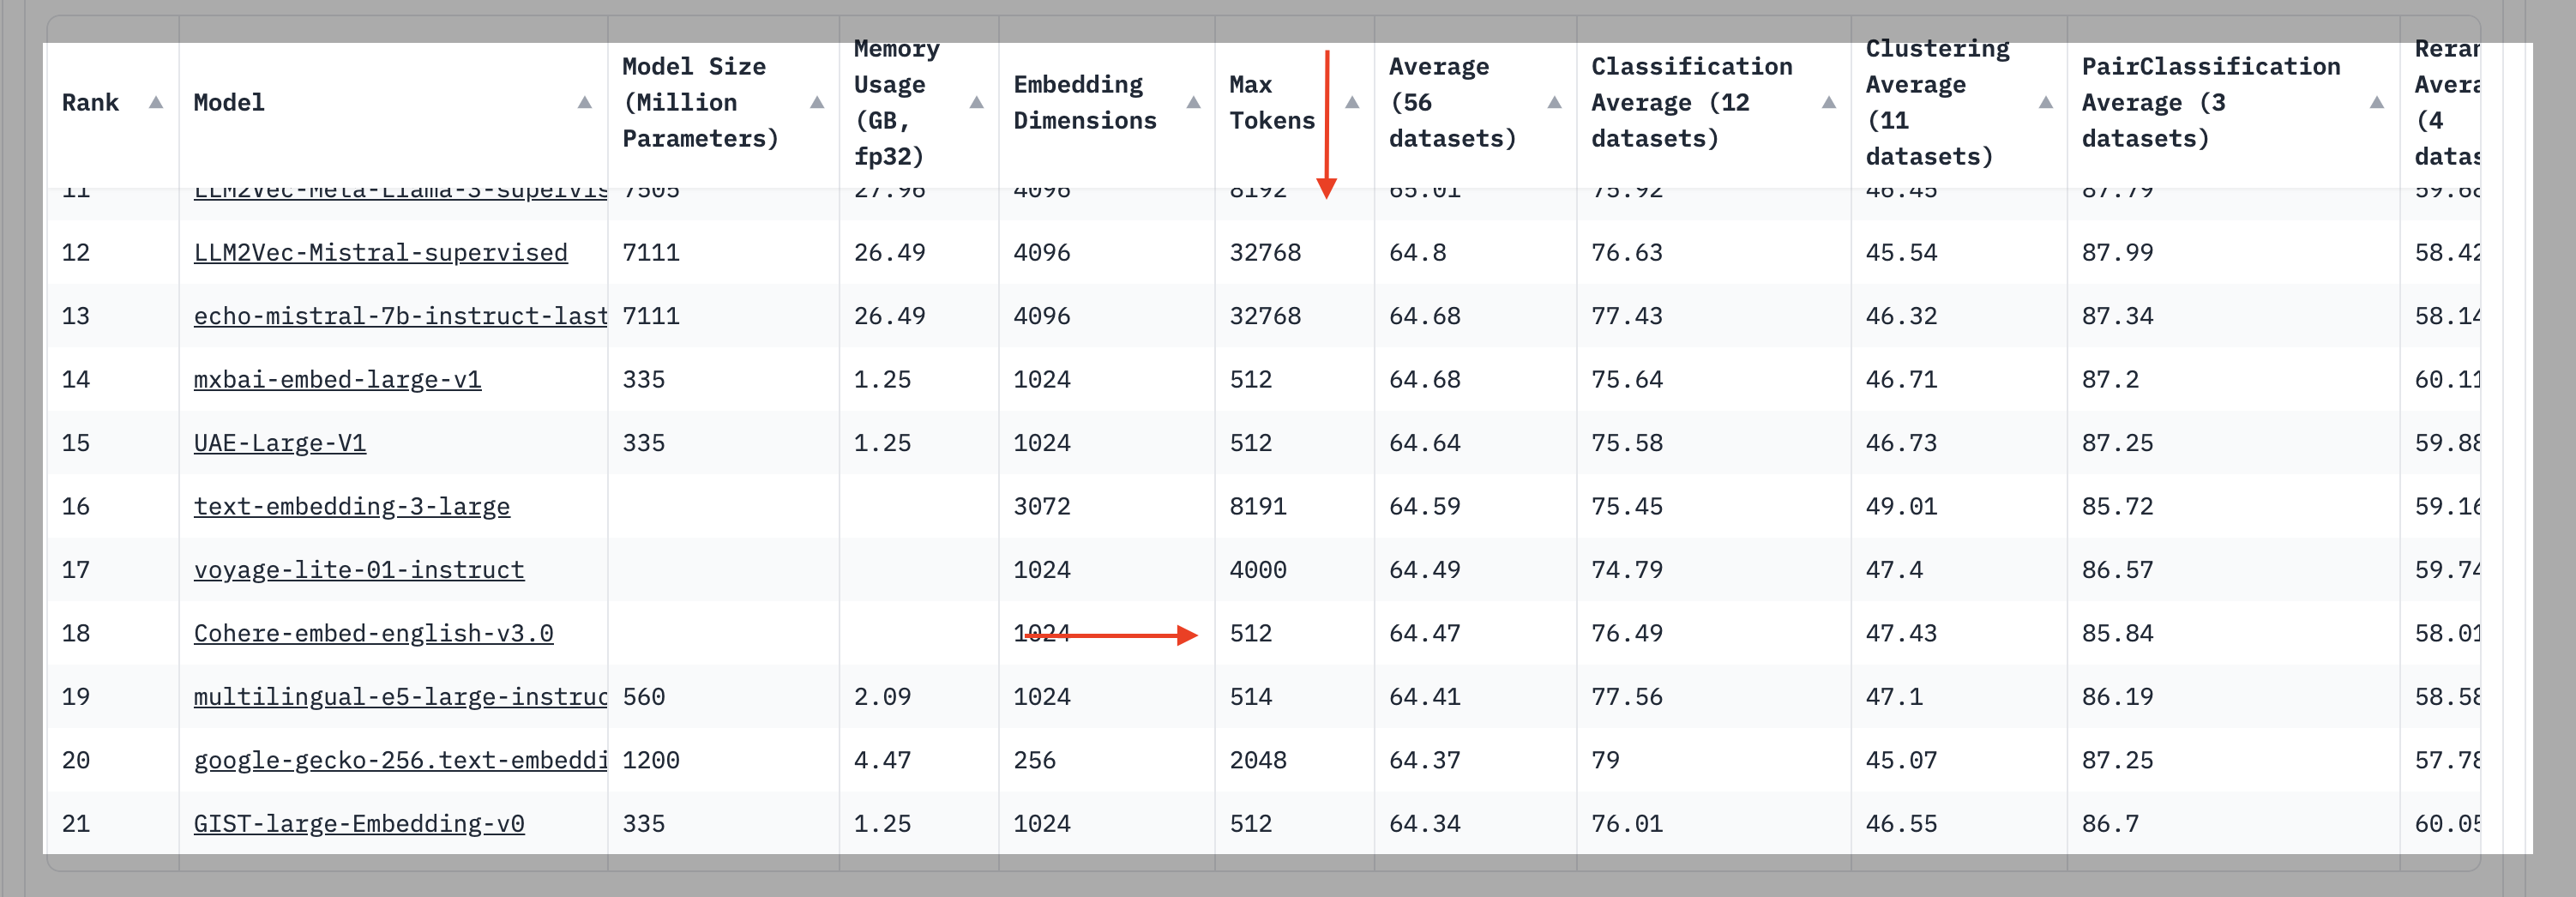

In [253]:
from IPython.display import Image
Image(filename='Emb_Dim.png',width=1200)

### based on Embedding Model

In [193]:
from langchain_text_splitters import TokenTextSplitter

https://huggingface.co/spaces/mteb/leaderboard

In [194]:
text_splitter = TokenTextSplitter(
    model_name="text-embedding-ada-002", 
    chunk_size=200,
    chunk_overlap=0,)

In [195]:
chunks = text_splitter.create_documents([text])

In [206]:
chunks

[Document(page_content='\nTransformer is a deep neural network that employs a self-attention mechanism to comprehend the contextual\nrelationships within sequential data. Unlike conventional neural networks or updated versions of\nRecurrent Neural Networks (RNNs) such as Long Short-Term Memory (LSTM), transformer models excel\nin handling long dependencies between input sequence elements and enable parallel processing. \n\nAs a result,transformer-based models have attracted substantial interest among researchers in the field of artificial intelligence.\nThis can be attributed to their immense potential and remarkable achievements, not only in Natural\nLanguage Processing (NLP) tasks but also in a wide range of domains, including computer vision, audio\nand speech processing, healthcare, and the Internet of Things (IoT).\n\nAlthough several survey papers have been published highlighting the transformer’s contributions in specific fields, architectural differences, or\nperformance evalua

In [197]:
import tiktoken

In [201]:
def num_tokens_from_string(string: str, model="text-embedding-ada-002") -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.encoding_for_model(model)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [204]:
for i in range(len(chunks)):
    print(f"Chunk: {i} \n Token Length: {num_tokens_from_string(chunks[i].page_content)} \n Content: {chunks[i].page_content} \n\n ")

Chunk: 0 
 Token Length: 200 
 Content: 
Transformer is a deep neural network that employs a self-attention mechanism to comprehend the contextual
relationships within sequential data. Unlike conventional neural networks or updated versions of
Recurrent Neural Networks (RNNs) such as Long Short-Term Memory (LSTM), transformer models excel
in handling long dependencies between input sequence elements and enable parallel processing. 

As a result,transformer-based models have attracted substantial interest among researchers in the field of artificial intelligence.
This can be attributed to their immense potential and remarkable achievements, not only in Natural
Language Processing (NLP) tasks but also in a wide range of domains, including computer vision, audio
and speech processing, healthcare, and the Internet of Things (IoT).

Although several survey papers have been published highlighting the transformer’s contributions in specific fields, architectural differences, or
performance ev

## Split by tokens based on LLM Context Length

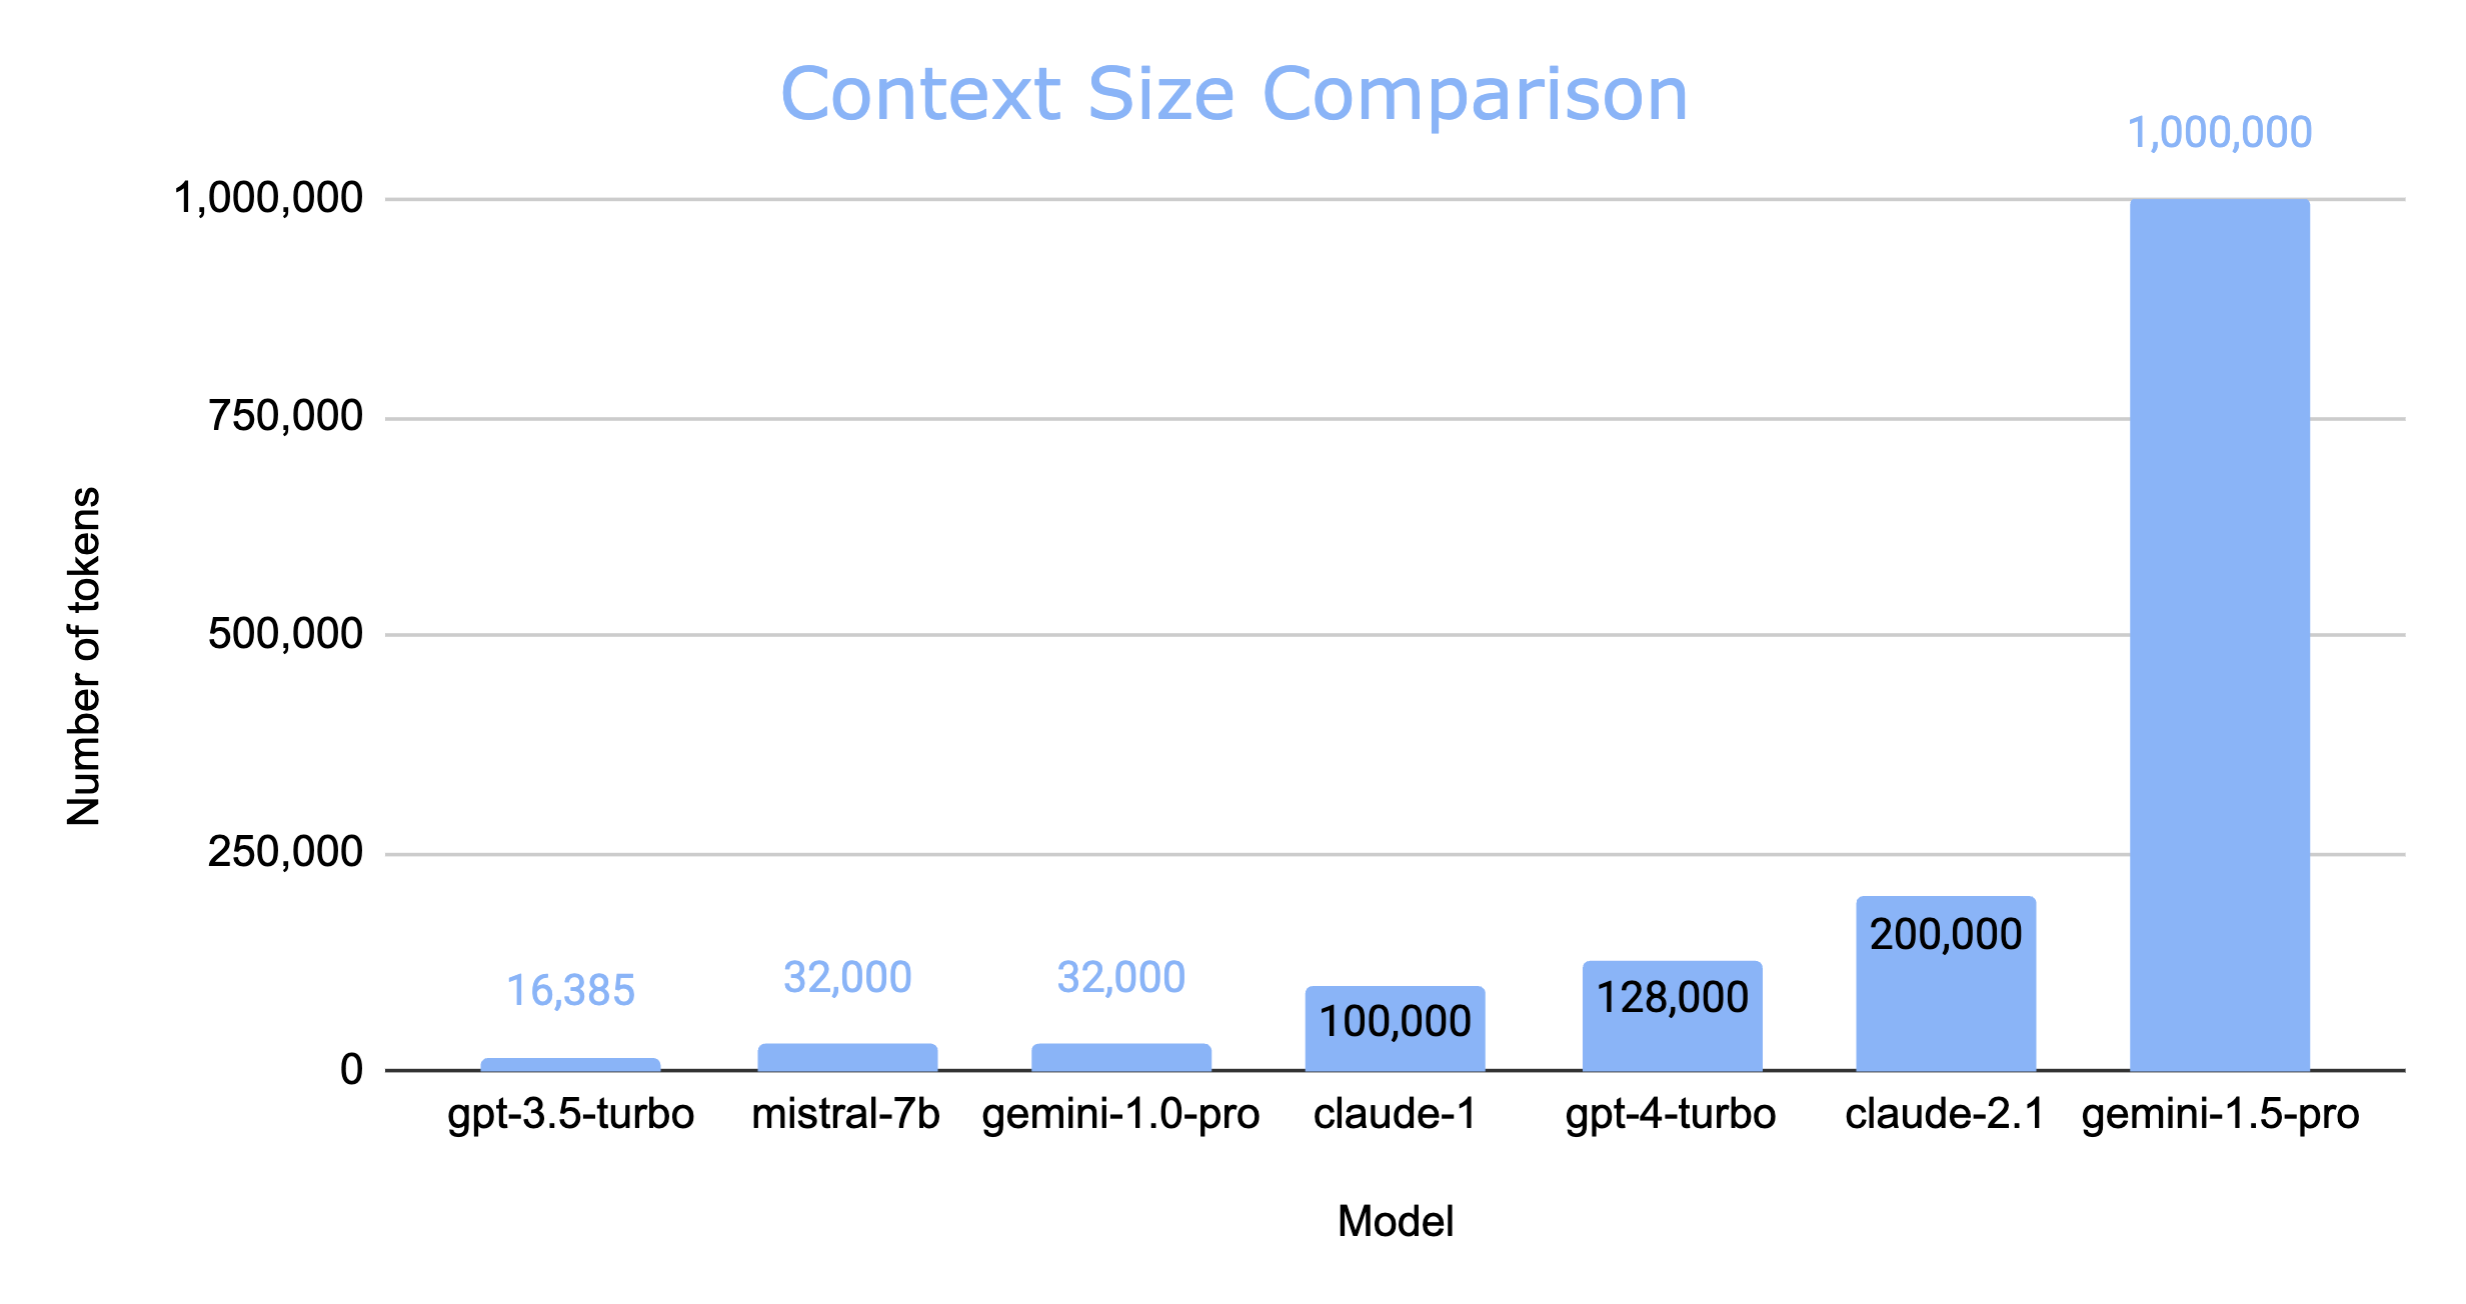

In [205]:
text_splitter = TokenTextSplitter(
    model_name="gpt-3.5-turbo", 
    chunk_size=1024,
    chunk_overlap=0,)

In [207]:
chunks = text_splitter.create_documents([text])
chunks

[Document(page_content='\nTransformer is a deep neural network that employs a self-attention mechanism to comprehend the contextual\nrelationships within sequential data. Unlike conventional neural networks or updated versions of\nRecurrent Neural Networks (RNNs) such as Long Short-Term Memory (LSTM), transformer models excel\nin handling long dependencies between input sequence elements and enable parallel processing. \n\nAs a result,transformer-based models have attracted substantial interest among researchers in the field of artificial intelligence.\nThis can be attributed to their immense potential and remarkable achievements, not only in Natural\nLanguage Processing (NLP) tasks but also in a wide range of domains, including computer vision, audio\nand speech processing, healthcare, and the Internet of Things (IoT).\n\nAlthough several survey papers have been published highlighting the transformer’s contributions in specific fields, architectural differences, or\nperformance evalua

## Semantic Chunking

- one chunk should not contain multiple meaning , concise meaning


### Breakpoints

This chunker works by determining when to "break" apart sentences. This is done by looking for differences in embeddings between any two sentences. When that difference is past some threshold, then they are split.

There are a few ways to determine what that threshold is.

### Percentile
The default way to split is based on percentile. In this method, all differences between sentences are calculated, and then any difference greater than the X percentile is split.

In [208]:
from langchain_experimental.text_splitter import SemanticChunker

In [209]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-base-en-v1.5"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity
embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
)

/Users/aritra.sen/Aritra/coding/my_llm_app/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/aritra.sen/Aritra/coding/my_llm_app/.venv/lib/python3.10/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/Users/aritra.sen/Aritra/coding/my_llm_app/.venv/lib/python3.10/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


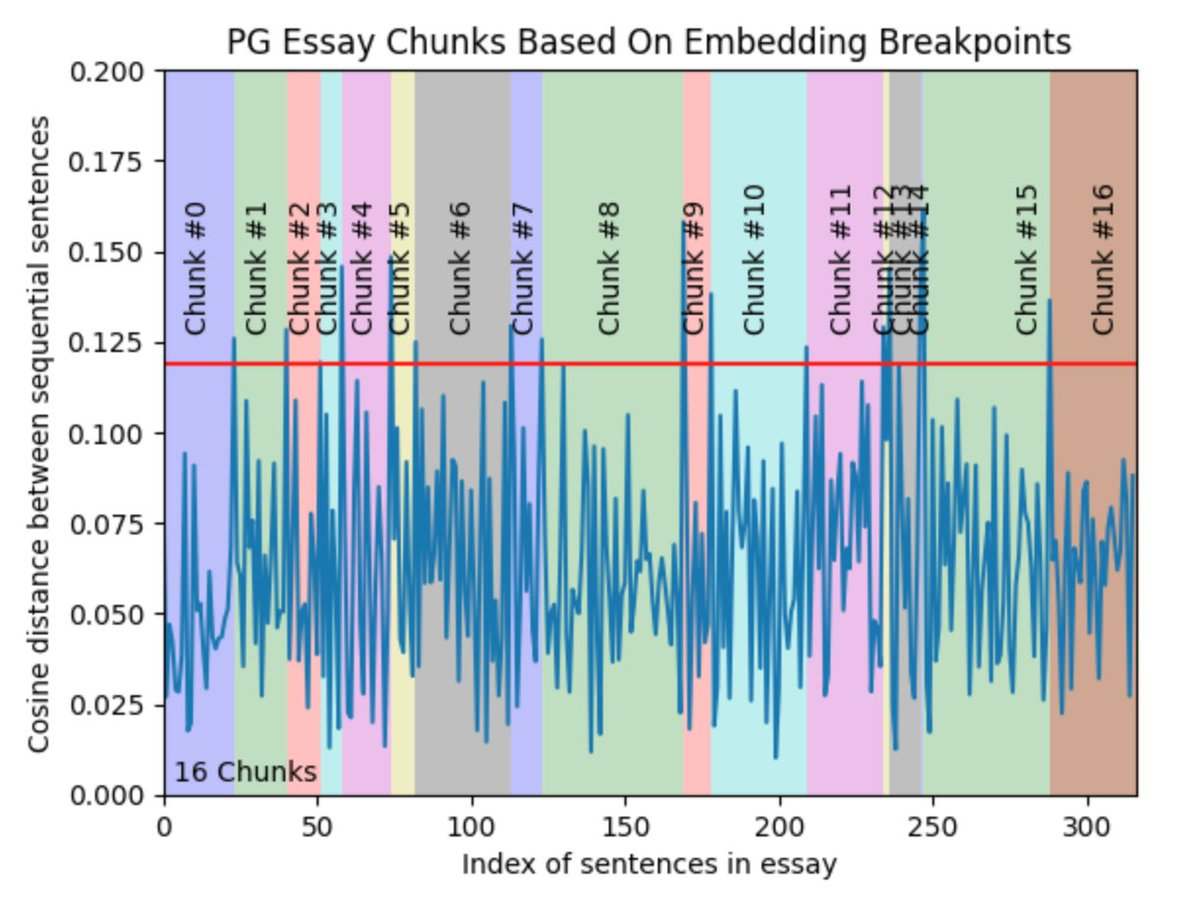

In [262]:
text_splitter = SemanticChunker(embeddings=embeddings,
                                 breakpoint_threshold_type="percentile",
                                 breakpoint_threshold_amount=55,
                                 )

In [263]:
chunks = text_splitter.create_documents([text])
chunks

[Document(page_content='\nTransformer is a deep neural network that employs a self-attention mechanism to comprehend the contextual\nrelationships within sequential data. Unlike conventional neural networks or updated versions of\nRecurrent Neural Networks (RNNs) such as Long Short-Term Memory (LSTM), transformer models excel\nin handling long dependencies between input sequence elements and enable parallel processing.'),
 Document(page_content='As a result,transformer-based models have attracted substantial interest among researchers in the field of artificial intelligence.'),
 Document(page_content='This can be attributed to their immense potential and remarkable achievements, not only in Natural\nLanguage Processing (NLP) tasks but also in a wide range of domains, including computer vision, audio\nand speech processing, healthcare, and the Internet of Things (IoT). Although several survey papers have been published highlighting the transformer’s contributions in specific fields, arc

### Text with two different meanings 
 - transoformers
 - Article 370 of the Constitution of India

In [264]:
text = """
Transformer is a deep neural network that employs a self-attention mechanism to comprehend the contextual
relationships within sequential data. Unlike conventional neural networks or updated versions of
Recurrent Neural Networks (RNNs) such as Long Short-Term Memory (LSTM), transformer models excel
in handling long dependencies between input sequence elements and enable parallel processing. 

As a result,transformer-based models have attracted substantial interest among researchers in the field of artificial intelligence.
This can be attributed to their immense potential and remarkable achievements, not only in Natural
Language Processing (NLP) tasks but also in a wide range of domains, including computer vision, audio
and speech processing, healthcare, and the Internet of Things (IoT).

Although several survey papers have been published highlighting the transformer’s contributions in specific fields, architectural differences, or
performance evaluations, there is still a significant absence of a comprehensive survey paper encompassing
its major applications across various domains. Therefore, we undertook the task of filling this gap by conducting
an extensive survey of proposed transformer models from 2017 to 2022. Our survey encompasses
the identification of the top five application domains for transformer-based models, namely: NLP, Computer
Vision, Multi-Modality, Audio and Speech Processing, and Signal Processing. We analyze the impact of
highly influential transformer-based models in these domains and subsequently classify them based on their
respective tasks using a proposed taxonomy. Our aim is to shed light on the existing potential and future
possibilities of transformers for enthusiastic researchers, thus contributing to the broader understanding of
this groundbreaking technology.

Article 370 of the Indian constitution[a] gave special status to Jammu and Kashmir, a region located in the northern part of the Indian subcontinent and part of the larger region of Kashmir 
which has been the subject of a dispute between India, Pakistan and China since 1947.[4][5] 
Jammu and Kashmir was administered by India as a state from 17 November 1952 to 31 October 2019, and Article 370 conferred on it the power to 
have a separate constitution, a state flag, and autonomy of internal administration.[6][7]

Article 370 was drafted in Part XXI of the Indian constitution titled "Temporary, Transitional and Special Provisions".[8] 
It stated that the Constituent Assembly of Jammu and Kashmir would be empowered to recommend the extent to which the Indian constitution would apply to the state. The state assembly could also abrogate the Article 370 altogether, in which case all of Indian Constitution would have applied to the state.

After the state constituent assembly was convened, it recommended the provisions of the Indian constitution that should apply to the state,
based on which 1954 Presidential Order was issued. Since the state constituent assembly dissolved itself without recommending the abrogation of Article 370,
the article was deemed to have become a permanent feature of the Indian Constitution.[9][10]

"""



In [265]:
text_splitter = SemanticChunker(embeddings=embeddings,
                                 breakpoint_threshold_type="percentile"
                                 )

In [266]:
chunks = text_splitter.create_documents([text])
chunks

[Document(page_content='\nTransformer is a deep neural network that employs a self-attention mechanism to comprehend the contextual\nrelationships within sequential data. Unlike conventional neural networks or updated versions of\nRecurrent Neural Networks (RNNs) such as Long Short-Term Memory (LSTM), transformer models excel\nin handling long dependencies between input sequence elements and enable parallel processing. As a result,transformer-based models have attracted substantial interest among researchers in the field of artificial intelligence. This can be attributed to their immense potential and remarkable achievements, not only in Natural\nLanguage Processing (NLP) tasks but also in a wide range of domains, including computer vision, audio\nand speech processing, healthcare, and the Internet of Things (IoT). Although several survey papers have been published highlighting the transformer’s contributions in specific fields, architectural differences, or\nperformance evaluations, t